In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. In-depth analysis of David Warner (Australian Batsmen) Performance

In [2]:
matches = pd.read_csv("matches.csv")

In [3]:
matches.shape

(636, 18)

In [4]:
df = pd.read_csv("deliveries.csv")
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [5]:
df_warner = df[df["batsman"] == "DA Warner"]

In [6]:
df_warner.shape

(2902, 21)

In [7]:
df_warner["dismissal_kind"].value_counts()

dismissal_kind
caught               62
bowled               21
run out               8
lbw                   4
stumped               4
caught and bowled     2
hit wicket            1
Name: count, dtype: int64

<Axes: ylabel='count'>

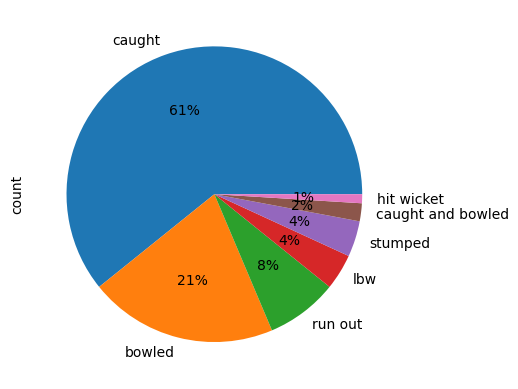

In [8]:
df_warner["dismissal_kind"].value_counts().plot.pie(autopct='%1.0f%%')

In [9]:
#no. of fours hit by warner

In [10]:
sum(df_warner["batsman_runs"]==4)

401

In [11]:
sum(df_warner["batsman_runs"]==6)

160

In [12]:
#total runs scored
def total(df,runs):
    return len(df[df["batsman_runs"]==runs])*runs


In [13]:
total(df_warner,1)

997

In [14]:
total(df_warner,2)

414

In [15]:
total(df_warner,3)

39

In [16]:
total(df_warner,4)

1604

In [17]:
total(df_warner,6)

960

In [18]:
slices = [997,414,39,1604,960]
labels = [1,2,3,4,6]
explode=[0,0,0,0.1,0]

([<matplotlib.patches.Wedge at 0x20f40393010>,
 [Text(0.7817643705069365, 0.7738504177203069, '1'),
  Text(-0.33959111687520577, 1.0462685474291247, '2'),
  Text(-0.6816960876596443, 0.863302058418451, '3'),
  Text(-1.1128316125234867, -0.44900534759440974, '4'),
  Text(0.8038429148449225, -0.750890516822272, '6')],
 [Text(0.4264169293674199, 0.4221002278474401, '24.8%'),
  Text(-0.18523151829556675, 0.5706919349613407, '10.3%'),
  Text(-0.3718342296325332, 0.4708920318646096, '1.0%'),
  Text(-0.6491517739720338, -0.261919786096739, '40.0%'),
  Text(0.4384597717335941, -0.4095766455394211, '23.9%')])

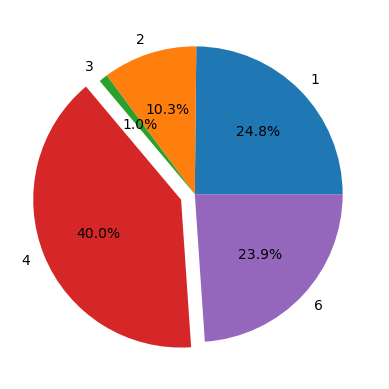

In [19]:
plt.pie(x=slices, labels=labels, autopct='%1.1f%%',explode =explode)

In [20]:
#no. of centuries
sum(df[df["batsman"] == "DA Warner"].groupby("match_id")["total_runs"].sum()>=100)

3

In [21]:
#no. of half-centuries
sum(df[df["batsman"] == "DA Warner"].groupby("match_id")["total_runs"].sum()>=50)

41

### 2. Score Distribution for Teams by Innings

In [22]:
df["bowling_team"].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [23]:
teams={
    'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':"KXIP",
       'Delhi Daredevils':"DD", 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':"DC", 'Kochi Tuskers Kerala':"KTK", 'Pune Warriors':"PW",
       'Rising Pune Supergiants':"RPS"
}

In [24]:
df["batting_team"] = df["batting_team"].map(teams)
df["bowling_team"] = df["bowling_team"].map(teams)

In [25]:
runs =df.groupby(["match_id","inning","batting_team"])["total_runs"].sum().reset_index()
runs.drop(columns=["match_id"],axis=1,inplace=True)
runs.sample(5)

,inning,batting_team,total_runs
1233,2,RCB,195
446,1,MI,183
1253,2,KKR,66
1098,2,RCB,99
1030,2,CSK,160


In [26]:
inning1 = runs[runs["inning"]==1]
inning2 = runs[runs["inning"]==2]

In [27]:
inning1["total_runs"].mean()

159.66509433962264

In [28]:
inning2["total_runs"].mean()

146.04731861198738

<Axes: xlabel='batting_team', ylabel='total_runs'>

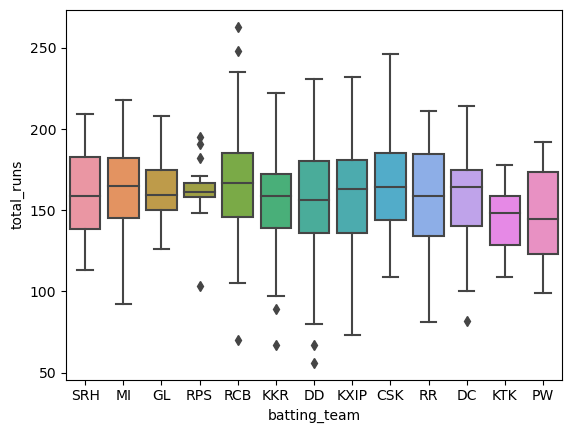

In [29]:
sns.boxplot(data=inning1, x="batting_team", y="total_runs")

<Axes: xlabel='batting_team', ylabel='total_runs'>

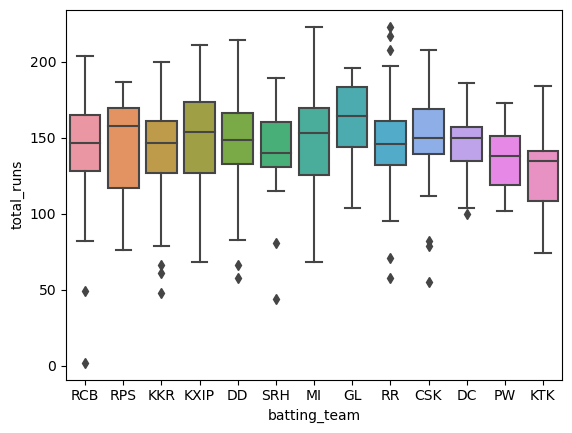

In [30]:
sns.boxplot(data=inning2, x="batting_team", y="total_runs")

### 3. How many times teams score more than 200?

In [31]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [32]:
high_scores = df.groupby(["match_id","inning","batting_team","bowling_team"])["total_runs"].sum().reset_index()

In [33]:
high_scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1279,634,2,KKR,SRH,140
1280,635,1,GL,SRH,162
1281,635,2,SRH,GL,163
1282,636,1,SRH,RCB,208


In [34]:
sum(high_scores["total_runs"]>=200)

67

<Axes: xlabel='batting_team', ylabel='count'>

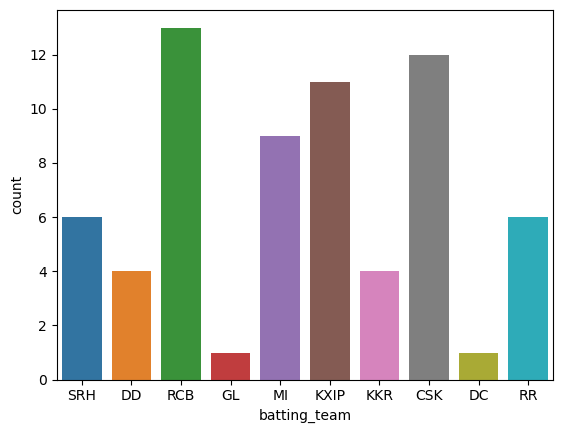

In [35]:
#no. of times teams scores 200+ scores
sns.countplot(data=high_scores[high_scores["total_runs"]>=200] ,x="batting_team")

<Axes: xlabel='bowling_team', ylabel='count'>

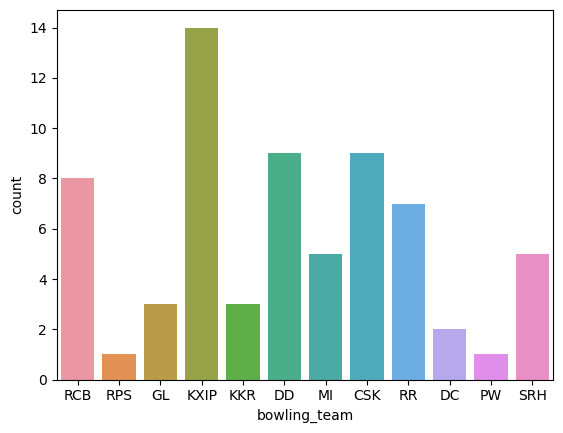

In [36]:
#no. of times teams conceded 200+ scores while bowling
sns.countplot(data=high_scores[high_scores["total_runs"]>=200] ,x="bowling_team")

### 4. Top 10 Batsman

In [37]:
a = df.groupby("batsman")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).head(10)
a

,batsman,total_runs
374,SK Raina,4745
431,V Kohli,4588
137,G Gambhir,4388
323,RG Sharma,4334
103,DA Warner,4213
340,RV Uthappa,4004
85,CH Gayle,3914
347,S Dhawan,3754
259,MS Dhoni,3728
22,AB de Villiers,3621


[Text(0, 0, 'SK Raina'),
 Text(1, 0, 'V Kohli'),
 Text(2, 0, 'G Gambhir'),
 Text(3, 0, 'RG Sharma'),
 Text(4, 0, 'DA Warner'),
 Text(5, 0, 'RV Uthappa'),
 Text(6, 0, 'CH Gayle'),
 Text(7, 0, 'S Dhawan'),
 Text(8, 0, 'MS Dhoni'),
 Text(9, 0, 'AB de Villiers')]

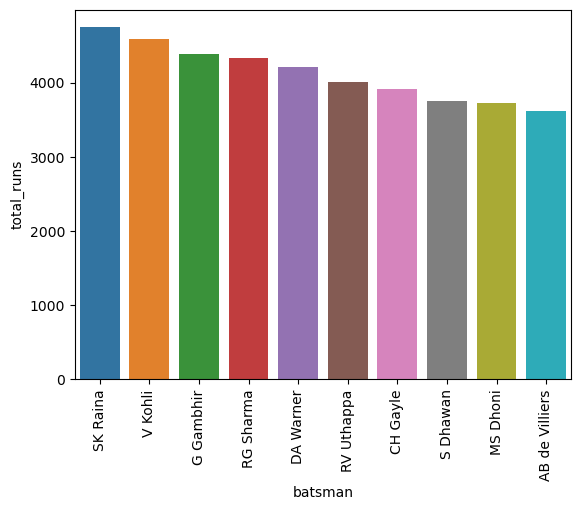

In [38]:
ax = sns.barplot(data=a, x="batsman", y="total_runs")
ax.set_xticklabels(labels=a["batsman"], rotation=90)

### 5. Top Individual Scores batsman

In [160]:
a = df.groupby(["match_id","batting_team","batsman"])["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).head(10)
a

,match_id,batting_team,batsman,total_runs
6207,411,RCB,CH Gayle,181
898,60,KKR,BB McCullum,169
8435,562,RCB,AB de Villiers,138
9268,620,RCB,AB de Villiers,132
4467,296,KXIP,AC Gilchrist,130
5594,372,RCB,CH Gayle,129
7752,516,KXIP,V Sehwag,129
3132,206,CSK,M Vijay,128
535,36,SRH,DA Warner,127
8367,557,RCB,CH Gayle,126


### 6. Highest Wicket Taker

In [40]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [41]:
df[~df["player_dismissed"].isna()].groupby("bowler")["match_id"].count().sort_values(ascending=False).head(10)

bowler
SL Malinga         170
A Mishra           142
DJ Bravo           137
Harbhajan Singh    136
PP Chawla          133
R Vinay Kumar      125
A Nehra            121
Z Khan             119
B Kumar            117
R Ashwin           110
Name: match_id, dtype: int64

In [162]:
df["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [164]:
df[df["dismissal_kind"].isin(['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket'])]["bowler"].value_counts()

bowler
SL Malinga         154
A Mishra           134
Harbhajan Singh    127
PP Chawla          126
DJ Bravo           122
                  ... 
JDS Neesham          1
D Salunkhe           1
LMP Simmons          1
SS Mundhe            1
S Vidyut             1
Name: count, Length: 310, dtype: int64

<Axes: xlabel='bowler'>

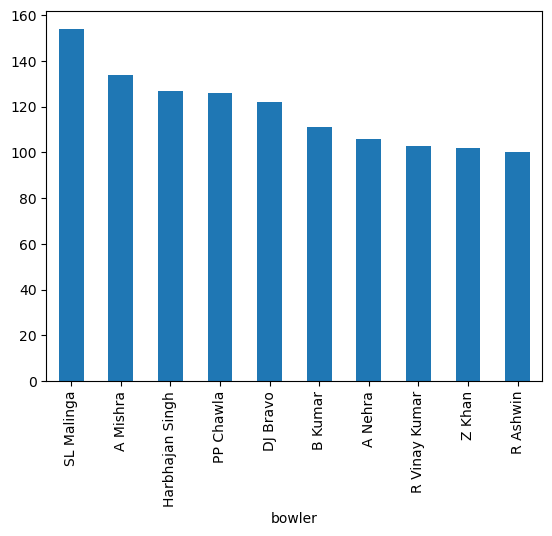

In [166]:
df[df["dismissal_kind"].isin(['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped', 'hit wicket'])]["bowler"].value_counts()[:10].plot(kind="bar")

### 7. Batsman Comparison

In [50]:
#how many balls faced each batsman
balls = df.groupby("batsman")["ball"].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


In [53]:
#how many runs scored each batsman
runs = df.groupby("batsman")["batsman_runs"].sum().reset_index()
runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [63]:
#no. of fours scored by each player
runs_4 = df[df["batsman_runs"]==4].groupby("batsman")["match_id"].count().reset_index()
runs_4.rename(columns={"match_id":"4s"},inplace=True)
runs_4

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [141]:
#no. of sixes scored by each player
runs_6 = df[df["batsman_runs"]==6].groupby("batsman")["match_id"].count().reset_index()
runs_6.rename(columns={"match_id":"6s"},inplace=True)
runs_6

,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Mishra,5
4,A Mithun,1
...,...,...
296,Y Venugopal Rao,37
297,YK Pathan,149
298,YV Takawale,3
299,Yuvraj Singh,141


In [142]:
a = pd.merge(balls,runs)

In [143]:
a

,batsman,ball,batsman_runs
0,A Ashish Reddy,196,280
1,A Chandila,7,4
2,A Chopra,75,53
3,A Choudhary,20,25
4,A Flintoff,57,62
...,...,...,...
456,YV Takawale,183,192
457,Yashpal Singh,67,47
458,Younis Khan,7,3
459,Yuvraj Singh,2050,2591


In [144]:
b = pd.merge(runs_4, runs_6, how="outer")

In [145]:
player = pd.merge(a, b, how="outer")
player

,batsman,ball,batsman_runs,4s,6s
0,A Ashish Reddy,196,280,16.0,15.0
1,A Chandila,7,4,NaN,NaN
2,A Chopra,75,53,7.0,NaN
3,A Choudhary,20,25,1.0,1.0
4,A Flintoff,57,62,5.0,2.0
...,...,...,...,...,...
456,YV Takawale,183,192,26.0,3.0
457,Yashpal Singh,67,47,5.0,NaN
458,Younis Khan,7,3,NaN,NaN
459,Yuvraj Singh,2050,2591,205.0,141.0


In [146]:
# -----------------------------------------------------------------

In [147]:
# #another way instead of merge
# player = pd.concat([runs, balls.iloc[:,1], runs_4.iloc[:,1], runs_6.iloc[:,1]], axis=1)

In [148]:
# --------------------------------------------------------------------

In [149]:
player.fillna(0,inplace=True)
player.sample(5)

,batsman,ball,batsman_runs,4s,6s
176,JH Kallis,2291,2427,255.0,44.0
283,P Awana,14,5,0.0,0.0
16,AA Jhunjhunwala,218,217,19.0,5.0
188,K Rabada,68,55,5.0,1.0
120,DNT Zoysa,9,11,1.0,0.0


In [150]:
player["strike_rate"] = round(player["batsman_runs"] / player["ball"]*100,2)

In [151]:
player.sample(5)

,batsman,ball,batsman_runs,4s,6s,strike_rate
191,KAJ Roach,9,10,1.0,0.0,111.11
401,Sandeep Sharma,36,26,1.0,0.0,72.22
144,GR Napier,16,15,1.0,0.0,93.75
333,RR Rossouw,51,53,3.0,3.0,103.92
262,MV Boucher,318,394,32.0,13.0,123.90


In [152]:
scores = df.groupby(["match_id","batsman"])["batsman_runs"].sum().reset_index()
scores.drop(columns=["match_id"], axis=1, inplace=True)

In [153]:
scores.sample(5)

,batsman,batsman_runs
9417,KS Williamson,7
1577,LR Shukla,15
1711,SR Watson,18
7809,M Vijay,37
9507,MC Henriques,4


In [154]:
scores = scores.groupby("batsman")["batsman_runs"].max().reset_index()
scores.rename(columns={"batsman_runs":"highest_score"},inplace=True)

In [155]:
scores.sample(5)

,batsman,highest_score
56,Azhar Mahmood,80
116,DJG Sammy,60
124,DR Martyn,19
126,DS Kulkarni,28
344,S Badree,8


In [156]:
players = pd.merge(player,scores)

In [157]:
players.sample(15)

,batsman,ball,batsman_runs,4s,6s,strike_rate,highest_score
9,A Nehra,63,41,3.0,1.0,65.08,22
174,JE Taylor,4,3,0.0,0.0,75.00,2
386,SP Jackson,31,38,5.0,0.0,122.58,16
330,RR Pant,381,564,47.0,30.0,148.03,97
457,Yashpal Singh,67,47,5.0,0.0,70.15,20
447,WPUJC Vaas,73,81,2.0,3.0,110.96,20
103,DA Warner,2902,4014,401.0,160.0,138.32,126
94,CM Gautam,158,169,17.0,6.0,106.96,33
210,Karanveer Singh,17,12,1.0,0.0,70.59,5
60,B Laughlin,9,4,0.0,0.0,44.44,4


In [159]:
players.sample(20)

,batsman,ball,batsman_runs,4s,6s,strike_rate,highest_score
242,MEK Hussey,1648,1977,198.0,52.0,119.96,116
52,Anirudh Singh,69,63,6.0,1.0,91.30,40
4,A Flintoff,57,62,5.0,2.0,108.77,24
15,AA Chavan,11,12,2.0,0.0,109.09,7
76,Basil Thampi,30,28,1.0,1.0,93.33,13
11,A Symonds,781,974,74.0,41.0,124.71,117
291,PC Valthaty,432,505,61.0,20.0,116.90,120
296,PP Chawla,467,515,49.0,15.0,110.28,24
22,AB de Villiers,2402,3486,287.0,158.0,145.13,133
90,CJ McKay,15,8,0.0,0.0,53.33,8
